This notebook performs Exploratory Data Analysis of the training dataset. The main findings can be summarised as follows:

1. The label and some relevant features have a very right skewed distribution;
2. There is strong multicollinearity between regressors, suggesting a careful feature selection is needed.
3. Many features have highly nonlinear relationships with the label;
4. The distribution of the regressors is heterogeneous, different for every role.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# load the datasets
train = pd.read_csv('../../data/train.csv', index_col=0)
test = pd.read_csv('../../data/test.csv', index_col=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15391 entries, 0 to 15390
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           15391 non-null  int64  
 1   short_name                   15391 non-null  object 
 2   long_name                    15391 non-null  object 
 3   player_positions             15391 non-null  object 
 4   overall                      15391 non-null  int64  
 5   potential                    15391 non-null  int64  
 6   value_eur                    15333 non-null  float64
 7   wage_eur                     15342 non-null  float64
 8   age                          15391 non-null  int64  
 9   dob                          15391 non-null  object 
 10  height_cm                    15391 non-null  int64  
 11  weight_kg                    15391 non-null  int64  
 12  club_team_id                 15342 non-null  float64
 13  club_name            

In [3]:
# summary statistics
train.describe(include='all')

id    short_name            long_name player_positions  \
count    15391.000000         15391                15391            15391   
unique            NaN         14659                15379              635   
top               NaN  J. Rodríguez  Alexander Johansson               CB   
freq              NaN            11                    2             1967   
mean    231528.535573           NaN                  NaN              NaN   
std      27015.569028           NaN                  NaN              NaN   
min         41.000000           NaN                  NaN              NaN   
25%     214610.500000           NaN                  NaN              NaN   
50%     236573.000000           NaN                  NaN              NaN   
75%     253613.000000           NaN                  NaN              NaN   
max     264638.000000           NaN                  NaN              NaN   

             overall     potential     value_eur       wage_eur           age  \
count   15391.000000  15391.000000  1.533300e+04   15342.000000  15391.000000   
unique           NaN           NaN           NaN            NaN           NaN   
top              NaN           NaN           NaN            NaN           NaN   
freq             NaN           NaN           NaN            NaN           NaN   
mean       65.769866     71.086219  2.851328e+06    8610.310402     25.210902   
std         6.890025      6.112911  7.528281e+06   18559.644411      4.753887   
min        47.000000     49.000000  9.000000e+03     456.558174     16.000000   
25%        61.000000     67.000000  4.750000e+05     947.936111     21.000000   
50%        66.000000     71.000000  9.750000e+05    2841.616875     25.000000   
75%        70.000000     75.000000  2.000000e+06    7683.740466     29.000000   
max        92.000000     93.000000  1.375000e+08  331680.463188     54.000000   

               dob  ...  mentality_composure  defending_marking_awareness  \
count        15391  ...         15391.000000                 15391.000000   
unique        5901  ...                  NaN                          NaN   
top     1996-02-29  ...                  NaN                          NaN   
freq            99  ...                  NaN                          NaN   
mean           NaN  ...            57.898967                    46.477292   
std            NaN  ...            12.206433                    20.243681   
min            NaN  ...            12.000000                     4.000000   
25%            NaN  ...            50.000000                    29.000000   
50%            NaN  ...            59.000000                    52.000000   
75%            NaN  ...            66.000000                    63.000000   
max            NaN  ...            95.000000                    92.000000   

        defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
count                15391.000000             15391.000000       15391.000000   
unique                        NaN                      NaN                NaN   
top                           NaN                      NaN                NaN   
freq                          NaN                      NaN                NaN   
mean                    47.906309                45.766097          16.478851   
std                     21.296095                20.821395          17.662887   
min                      5.000000                 5.000000           2.000000   
25%                     28.000000                25.000000           8.000000   
50%                     55.000000                53.000000          11.000000   
75%                     65.000000                63.000000          14.000000   
max                     93.000000                92.000000          91.000000   

        goalkeeping_handling goalkeeping_kicking  goalkeeping_positioning  \
count           15391.000000        15391.000000             15391.000000   
unique                   NaN                 NaN                     

We notice especially that the label has a mean of 2.8M in the training set, with a standard deviation of 7.5M. Looking at the following plots we can understand it has a highly right skewed distribution, as it is usually the case with variables with a financial interpretation, like the value of players.

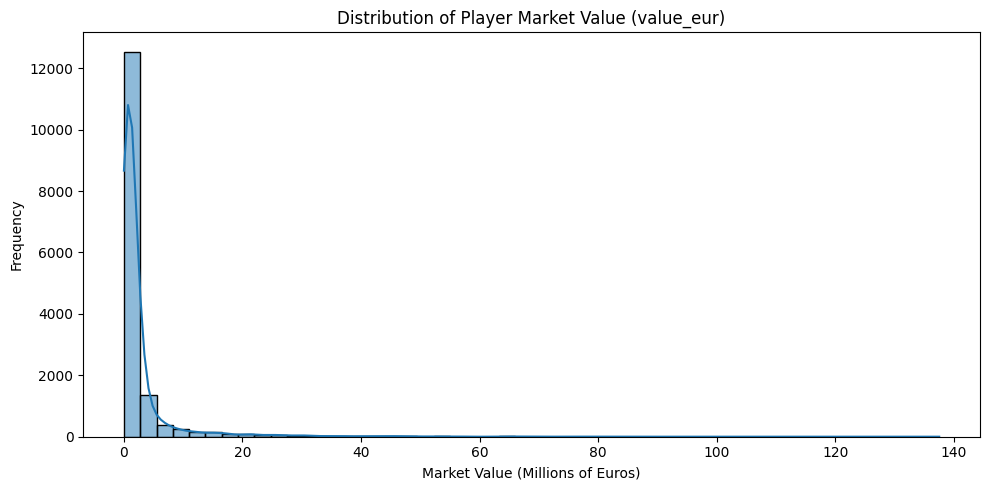

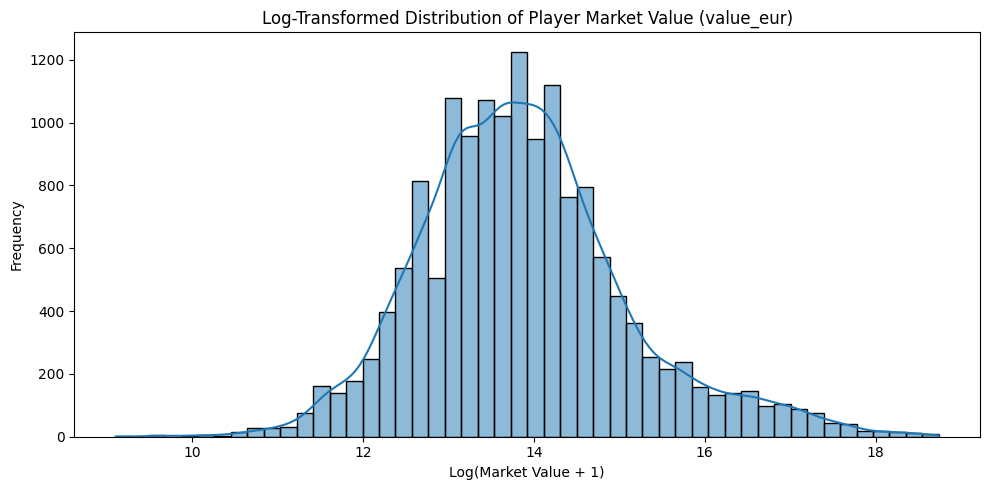

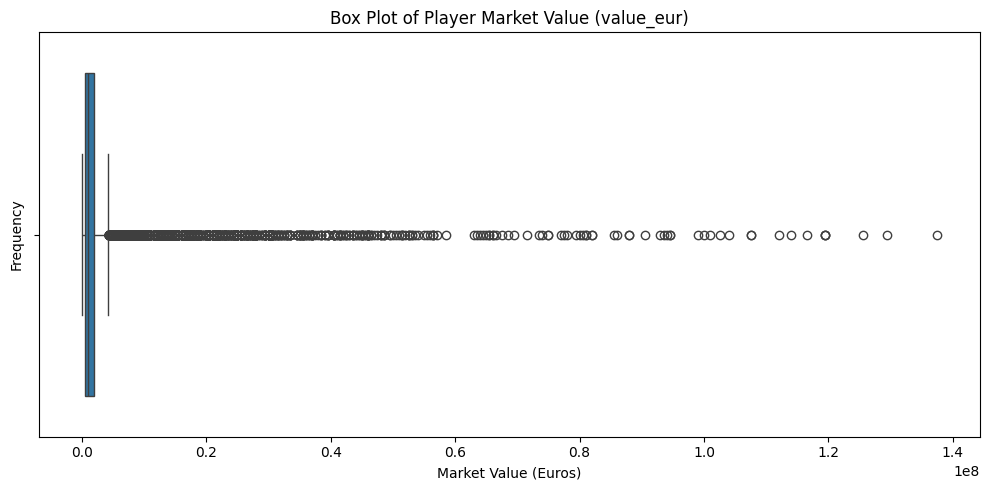

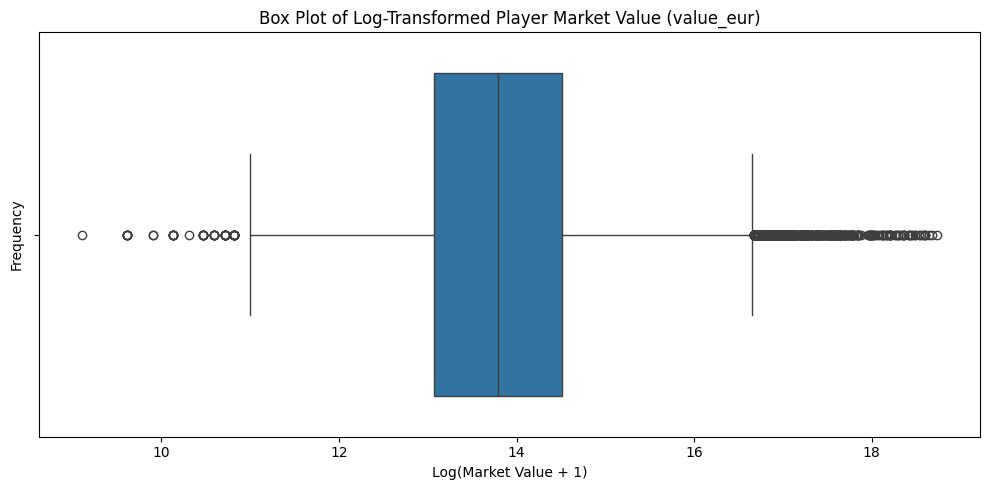

In [4]:
# density plot for the target variable
plt.figure(figsize=(10, 5))
sns.histplot(train['value_eur'] / 1e6, bins=50, kde=True)
plt.title('Distribution of Player Market Value (value_eur)')
plt.xlabel('Market Value (Millions of Euros)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# density plot for log-transformed target variable
plt.figure(figsize=(10, 5))
sns.histplot(np.log(train['value_eur'] + 1), bins=50, kde=True)
plt.title('Log-Transformed Distribution of Player Market Value (value_eur)')
plt.xlabel('Log(Market Value + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# box plot for the target variable
plt.figure(figsize=(10, 5))
sns.boxplot(x='value_eur', data=train)
plt.title('Box Plot of Player Market Value (value_eur)')
plt.xlabel('Market Value (Euros)')
plt.ylabel('Frequency')
#plt.xscale('log')
plt.tight_layout()
plt.show()

# box plot for the log-transformed target variable
plt.figure(figsize=(10, 5))
sns.boxplot(x=np.log(train['value_eur'] + 1), data=train)
plt.title('Box Plot of Log-Transformed Player Market Value (value_eur)')
plt.xlabel('Log(Market Value + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [5]:
# density plot of the distribution of these features: wage_eur, release_clause_eur, defending, 

We continue our exploration of the dataset considering the correlation matrix of the dataset. We observe that the variable "release_clause_eur" is extremely correlated with the label (corr = 0.99), but is Not Available for almost 1000 examples (around 6% of the dataset). Considering the large standard deviation of the label, we expect a simple model considering only this variable to still have a high bias.

Moreover, we observe a strong multicollinearity between technical features with a similar interpretation. For instance, "skill_long_passing", "attacking_short_passing", "passing" all have corr >= 0.85 with each other.
This suggests that keeping only the most general technical skill corresponding to a given technical attribute (i.e. "passing") should significantly reduce multicollinearity while still keeping a strong correlation with the label. This approach is likely to reduce overfitting.

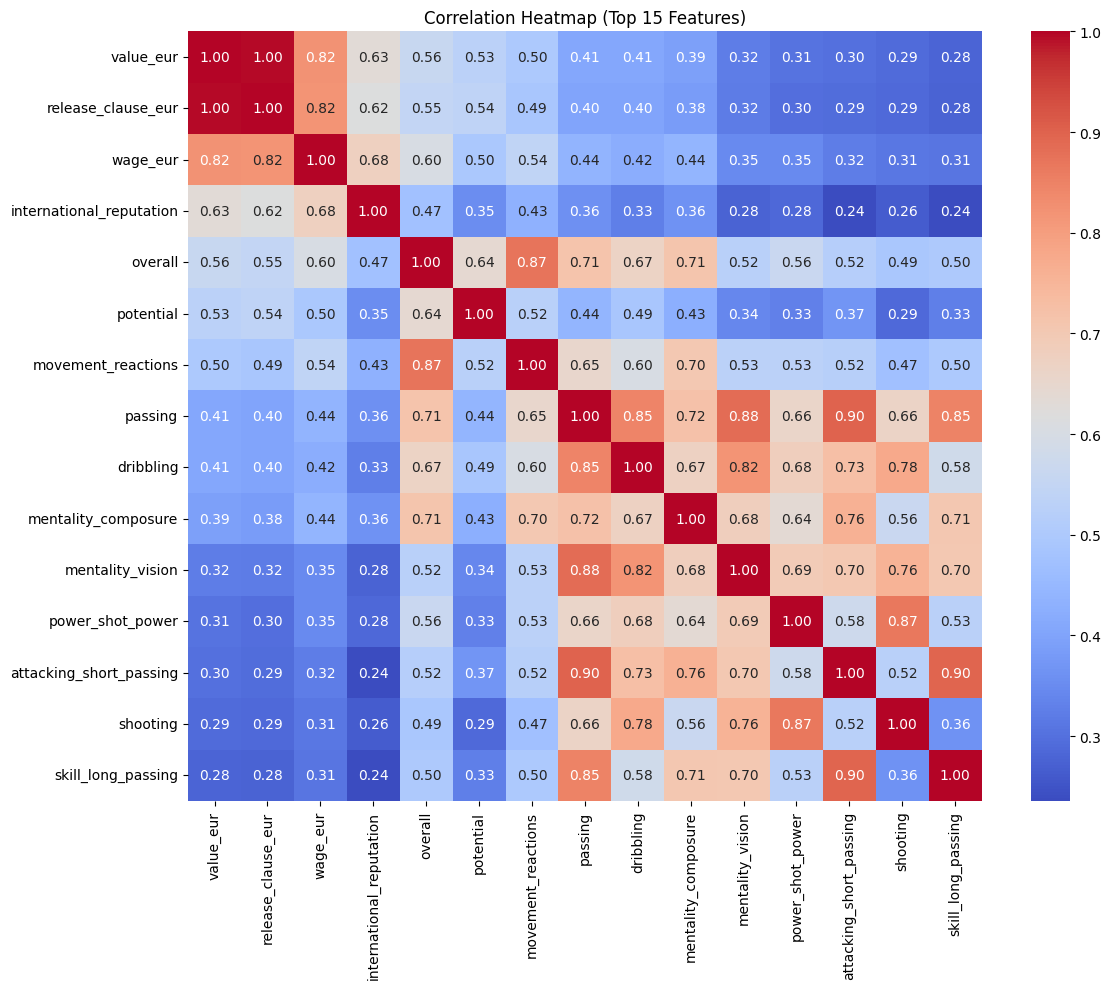

In [6]:
# Correlation with target (value_eur) for numerical features
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
corr = train[numerical_features].corr()['value_eur'].sort_values(ascending=False, key=abs)

# Heatmap of feature correlations (top 15 features)
plt.figure(figsize=(12, 10))
top_corr_features = corr.head(15).index
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Top 15 Features)')
plt.tight_layout()
plt.show()

In [7]:
# missing values in training and test sets
train_missing = train.isnull().sum().sort_values(ascending=False) / len(train)
test_missing = test.isnull().sum().sort_values(ascending=False) / len(test)
print(f"Missing values in training set:")
print(train_missing.head(20))
print("Missing values in test set:")
print(test_missing.head(20))

Missing values in training set:
nation_jersey_number         0.960691
nation_position              0.960691
club_loaned_from             0.943084
player_tags                  0.924631
goalkeeping_speed            0.887662
player_traits                0.515626
physic                       0.112338
defending                    0.112338
passing                      0.112338
shooting                     0.112338
pace                         0.112338
dribbling                    0.112338
release_clause_eur           0.060685
club_joined                  0.060100
value_eur                    0.003768
club_team_id                 0.003184
club_contract_valid_until    0.003184
club_name                    0.003184
club_jersey_number           0.003184
club_position                0.003184
dtype: float64
Missing values in test set:
nation_jersey_number         0.959979
nation_position              0.959979
club_loaned_from             0.941268
player_tags                  0.926975
goalkeeping_s

In [8]:
train["release_clause_eur"].isnull().sum()

np.int64(934)

The next step involves having a high-level idea of the type of relationship between explanatory variables and the label. 
From the following scatter plots, we observe that while "release_clause" has a strong linear relationship with the label, almost all other important regressors like "potential", "overall", "passing" have a highly nonlinear relationship, with increasing returns to value_eur: a slight increase in technical attributes can lead to huge increases in the label if it is happening near the upper support of the distribution.

We conclude that simple models are unlikely to accurately caputure the input-output relationships, and we should opt for flexible, nonlinear models.

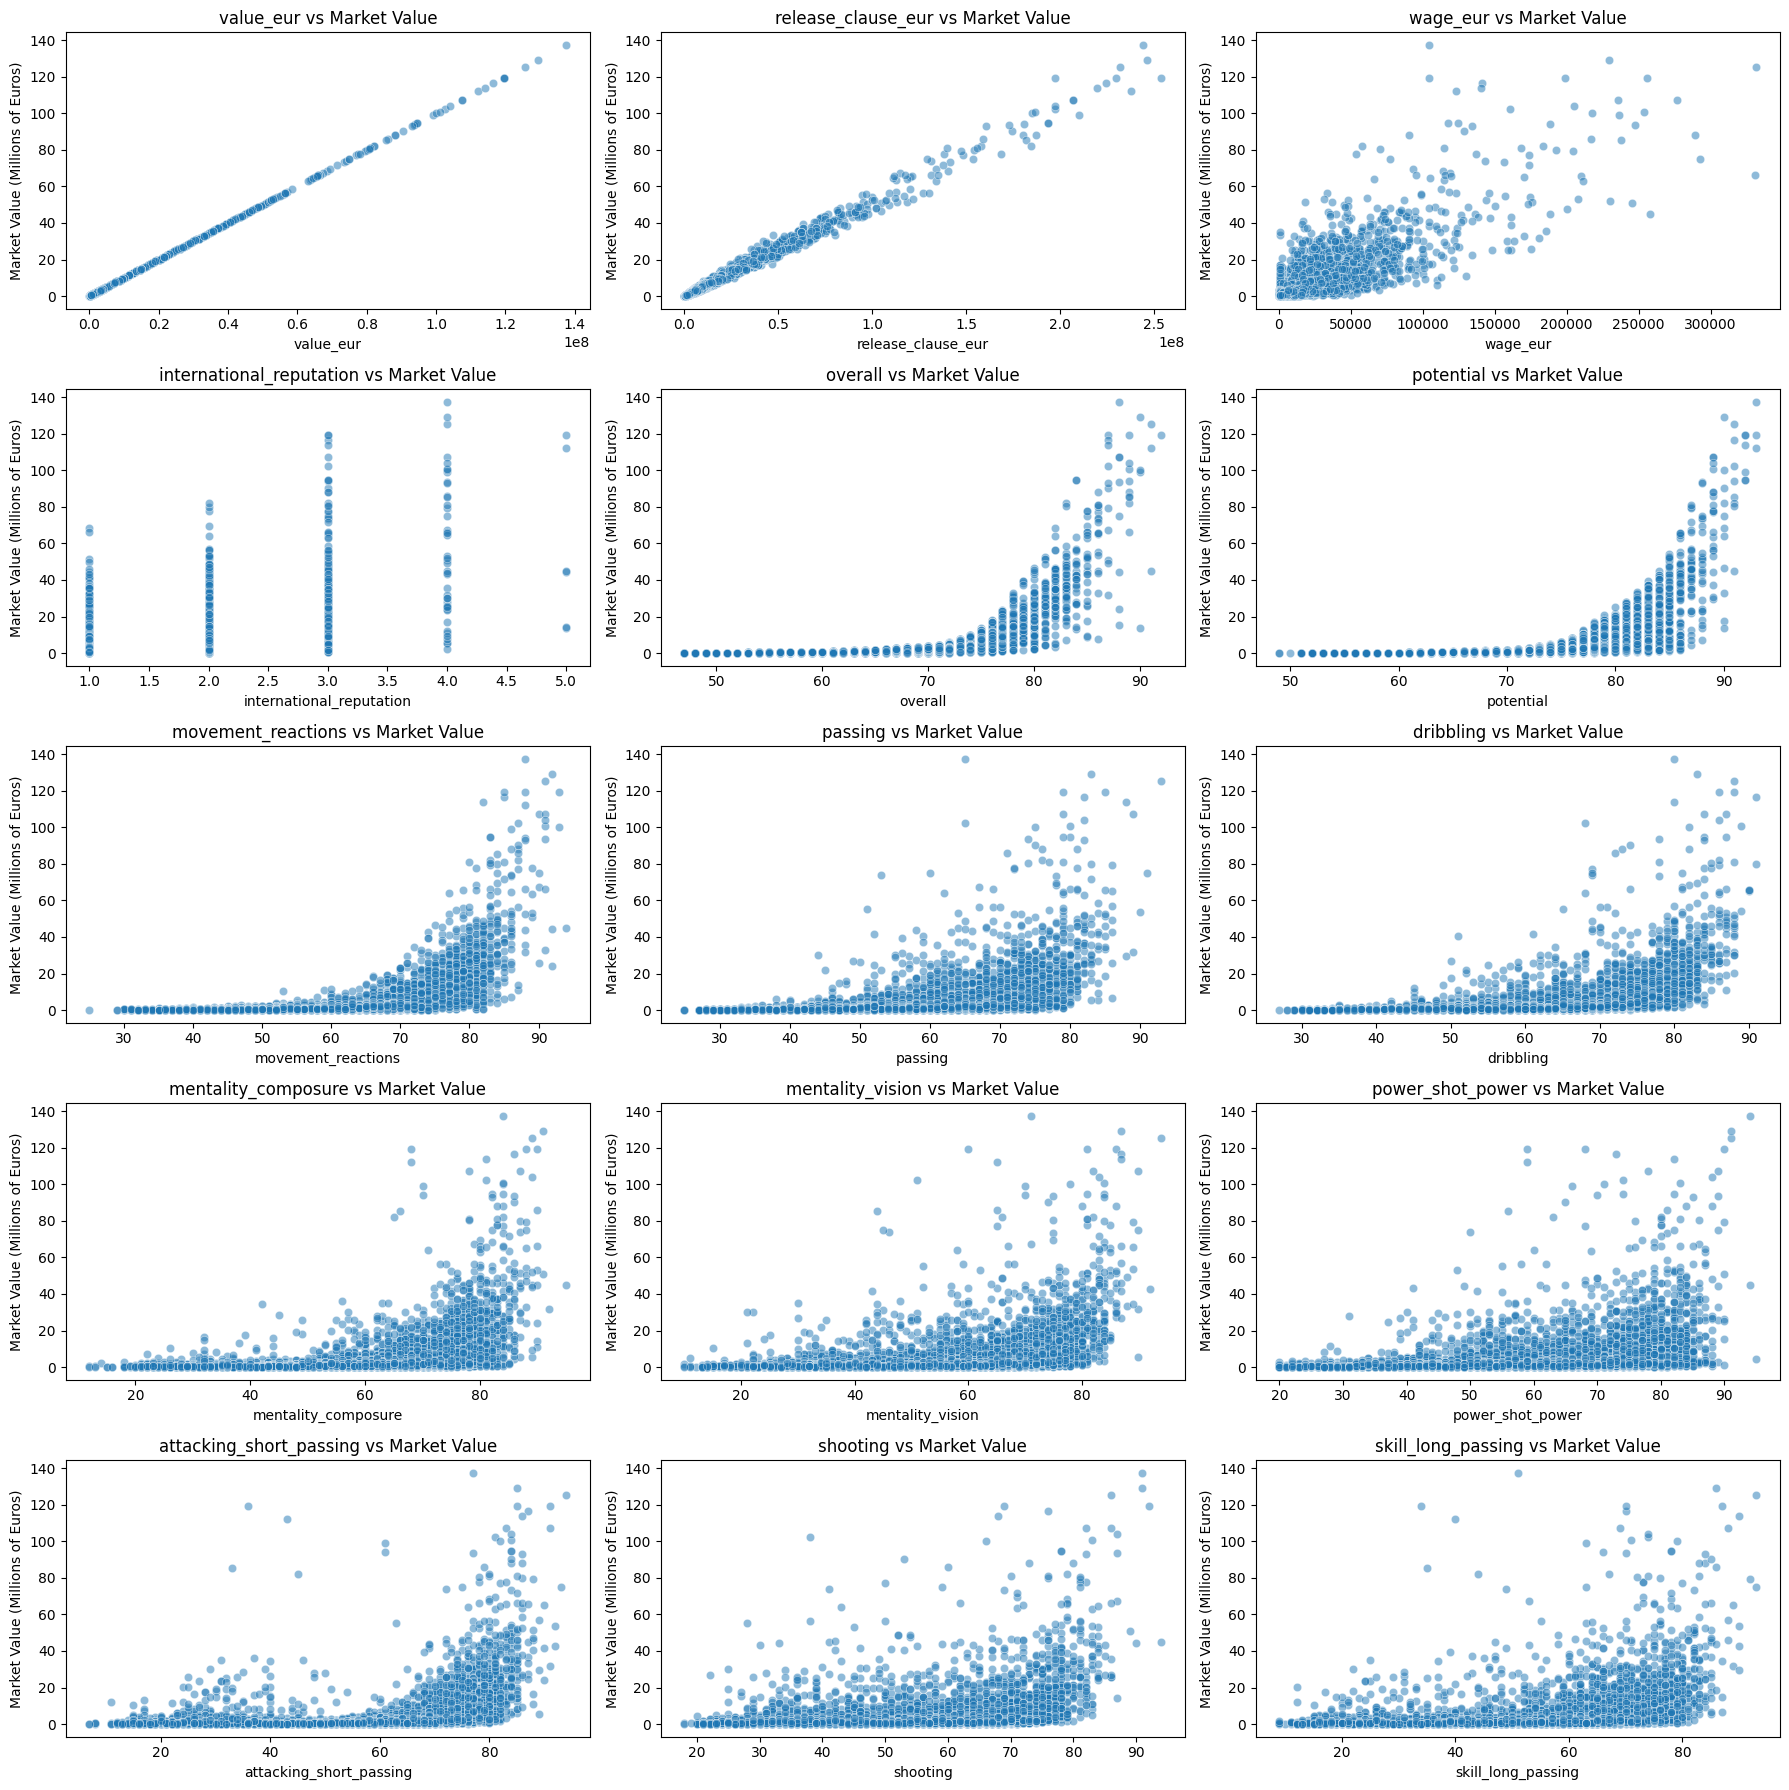

In [9]:
# Plot scatter plots of top 15 correlated features
fig, axes = plt.subplots(5, 3, figsize=(18, 18))
axes = axes.flatten()

for i, feature in enumerate(top_corr_features):
    sns.scatterplot(data=train, x=feature, y=train["value_eur"] / 1e6, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{feature} vs Market Value")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Market Value (Millions of Euros)")

plt.tight_layout()
plt.show()

The next phase of the exploration involves investigating the hypothesis that the *regressors distribution is multimodal*: players with different roles have very different characteristics and different correlations with the label.

To investigate this, we start by defining a new variable "position_group", which divides players into 4 main roles: goalkeepers, defenders, midfielders, attackers.
Then, we repeat the analysis above for each role separately, observing that:
1. some key features like "release_clause", "wage_eur", "overall" remain relevant for every role;
2. technical attributes become more relevant and have a very different correlation with the label depending on the role. For instance, the overall correlation of "shooting" with the label is 0.29, while for attackers it is 0.5.
4. However, this gives rise to strong multicollinearity between technical features relevant for each role, so again, regularization and feature selection are key.

In [10]:
# create a new column to categorizes player positions
def categorize_position(pos):
    if pd.isna(pos):
        return "Unknown"
    pos = pos.lower()
    if "gk" in pos:
        return "Goalkeeper"
    elif any(p in pos for p in ["cb", "rb", "lb", "rwb", "lwb"]):
        return "Defender"
    elif any(p in pos for p in ["cm", "cdm", "cam", "rm", "lm"]):
        return "Midfielder"
    elif any(p in pos for p in ["st", "cf", "rw", "lw"]):
        return "Attacker"
    else:
        return "Unknown"

train["position_group"] = train["player_positions"].apply(categorize_position)

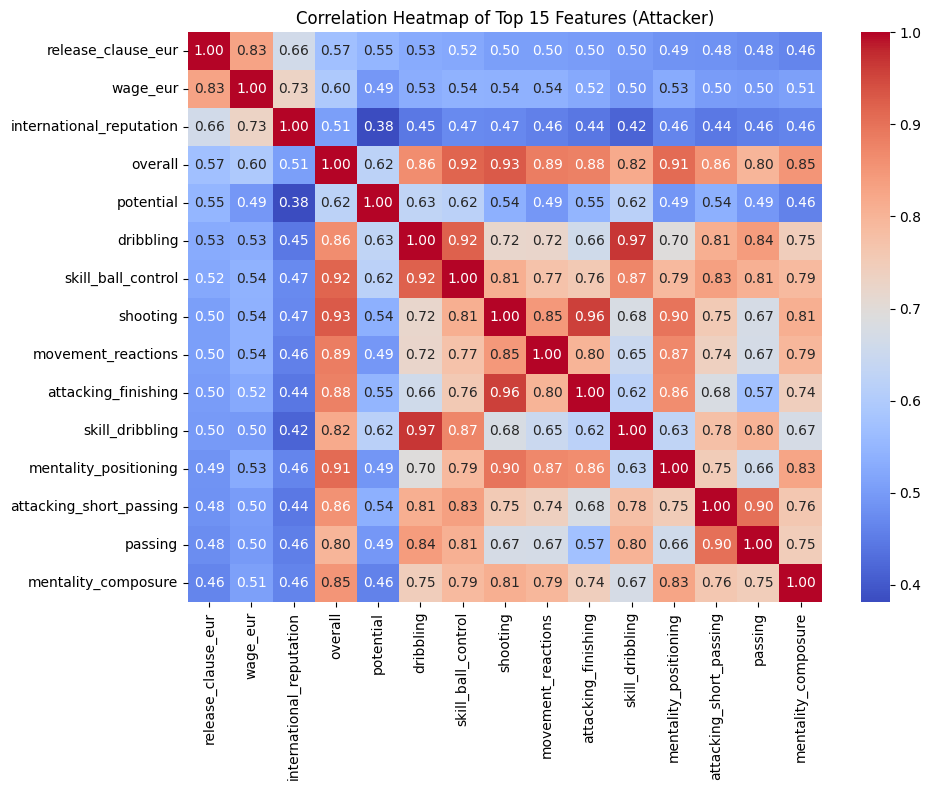

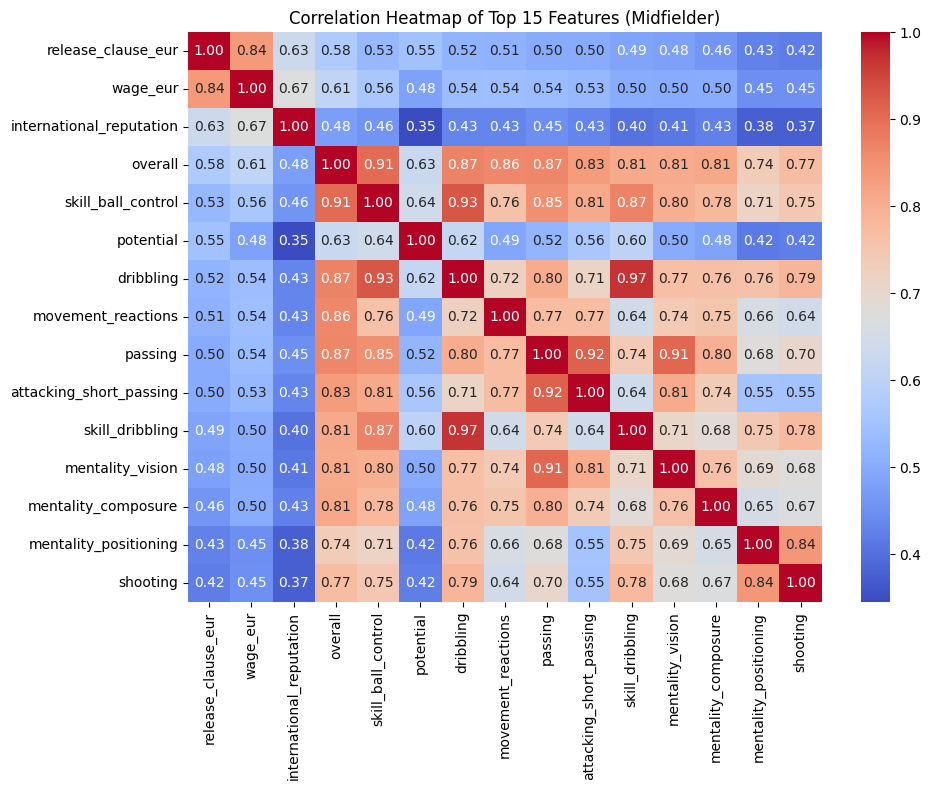

/Users/lorenzocaputi/Desktop/MACHINE LEARNING/ml_project/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/lorenzocaputi/Desktop/MACHINE LEARNING/ml_project/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


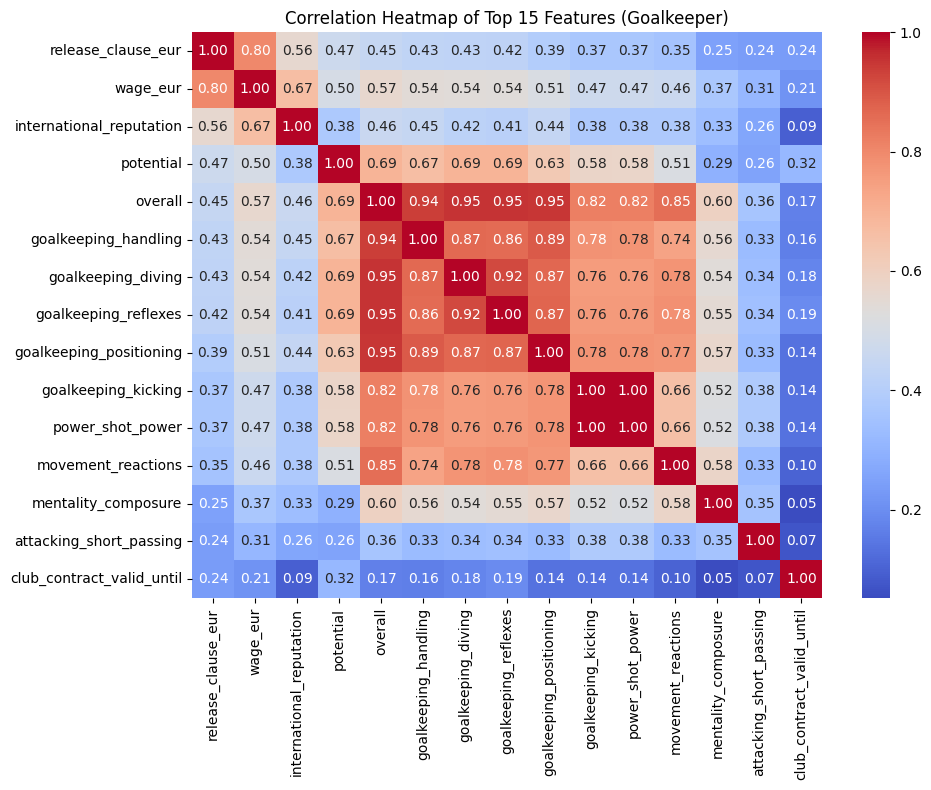

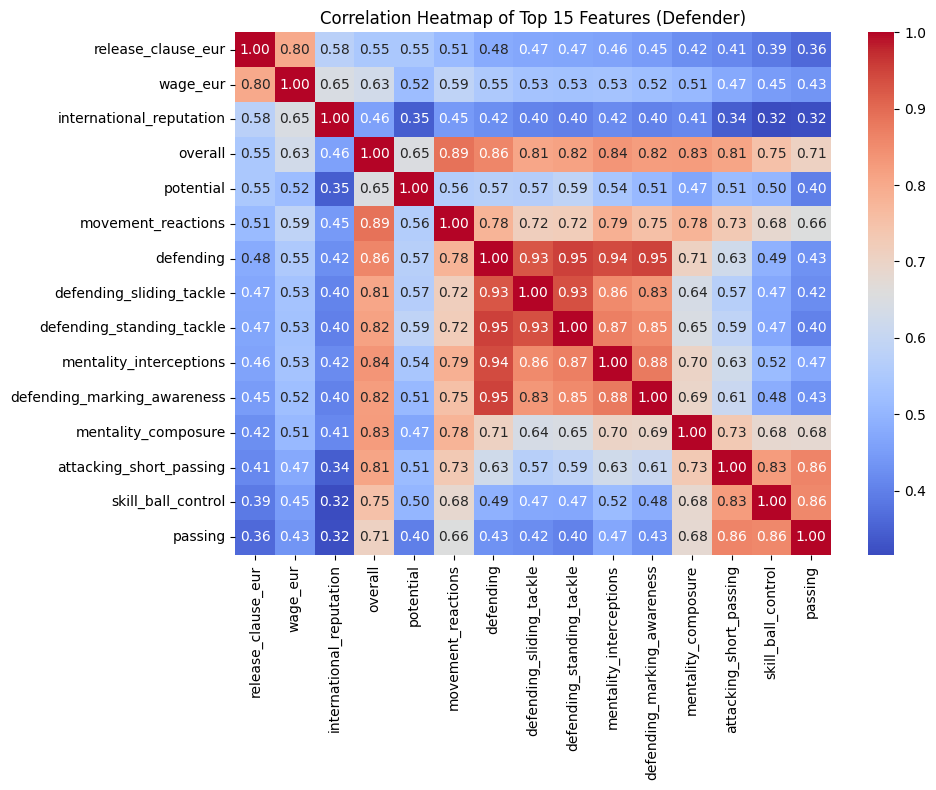

In [11]:
# Most correlated features for each player type
player_types = train["position_group"].unique()

for player_type in player_types:
    subset = train[train["position_group"] == player_type]
    numeric_cols = subset.select_dtypes(include=["int64", "float64"]).columns.drop(["value_eur", "value_eur_millions"], errors="ignore")
    corr = subset[numeric_cols].corrwith(subset["value_eur"]).sort_values(key=abs, ascending=False)
    top_15_features = corr.head(15).index

    plt.figure(figsize=(10, 8))
    sns.heatmap(subset[top_15_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"Correlation Heatmap of Top 15 Features ({player_type})")
    plt.tight_layout()
    plt.show()

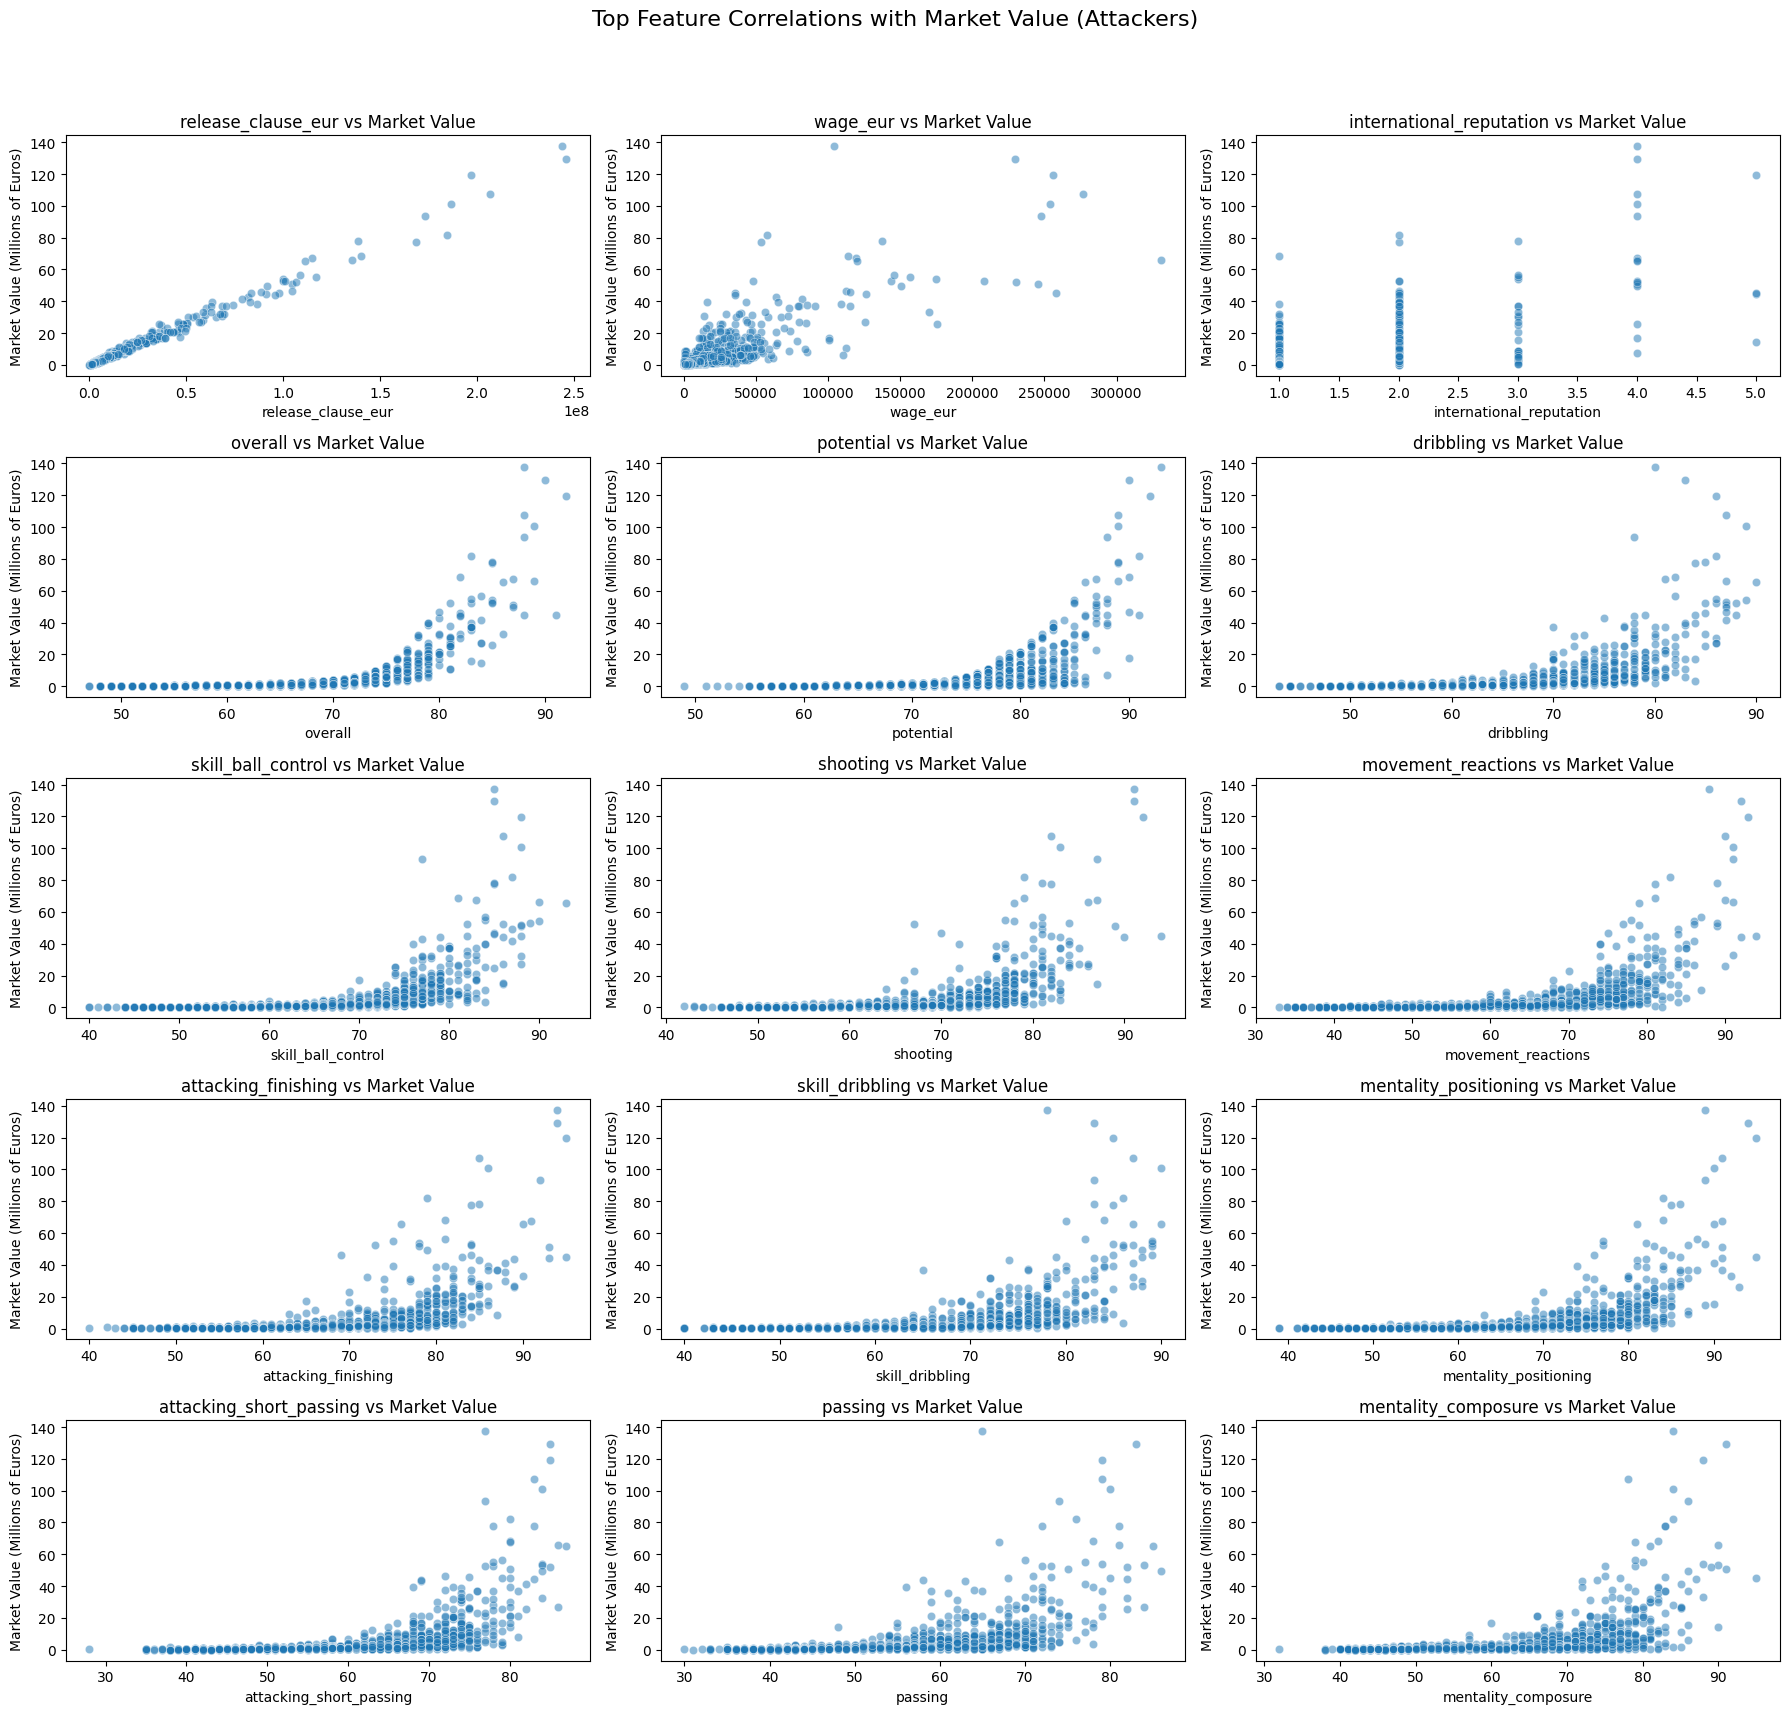

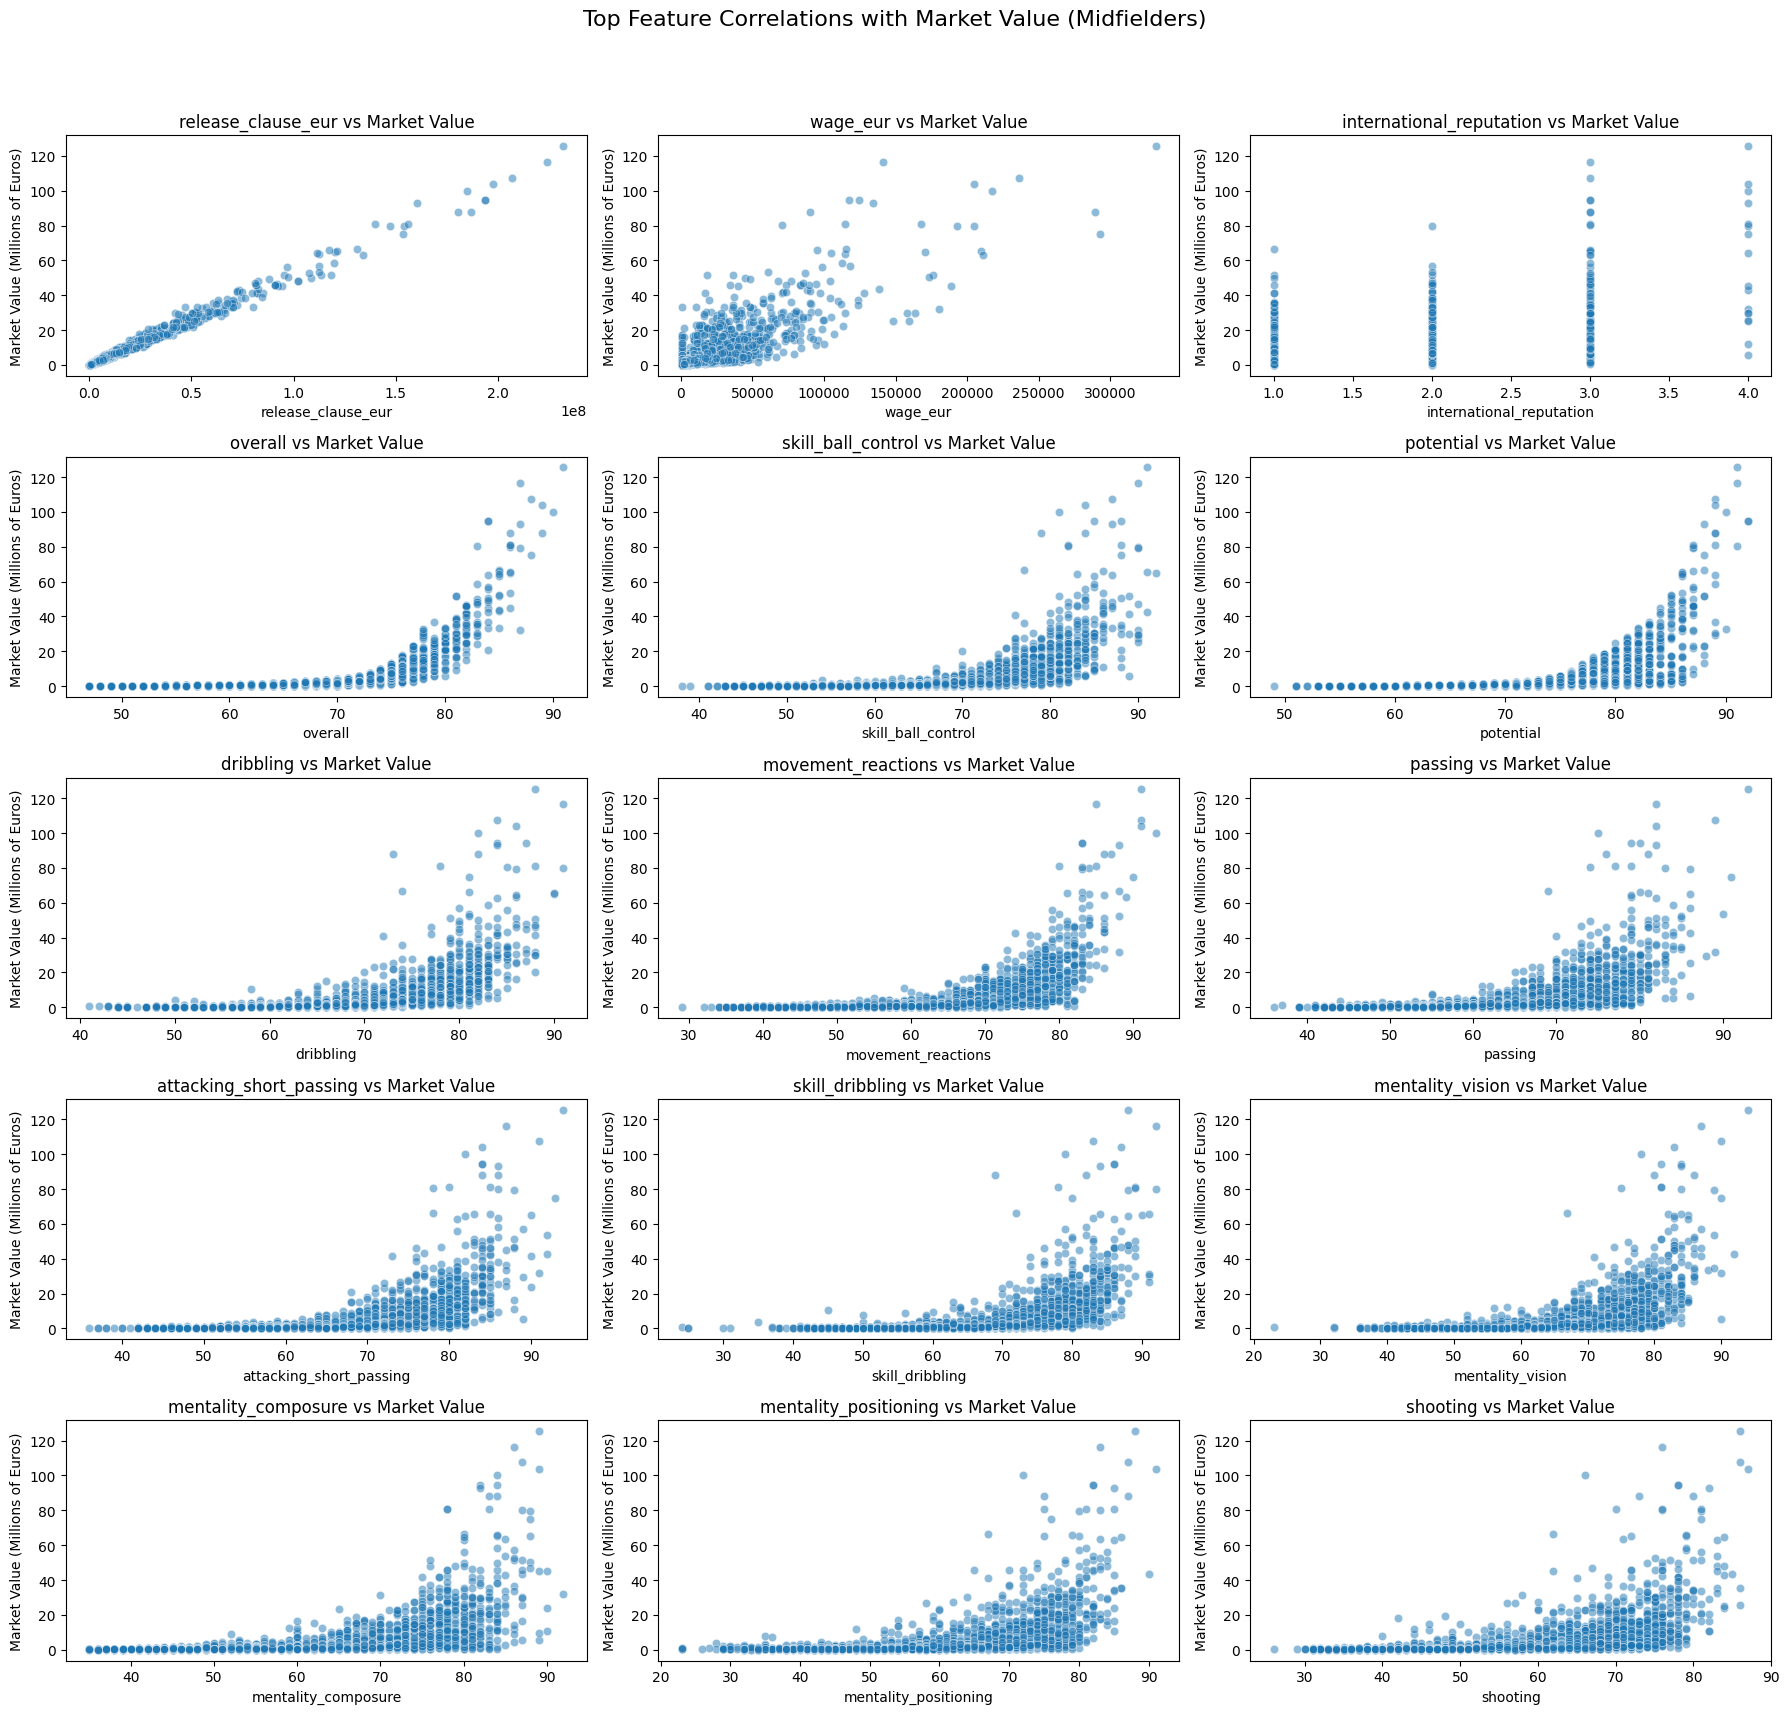

/Users/lorenzocaputi/Desktop/MACHINE LEARNING/ml_project/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/lorenzocaputi/Desktop/MACHINE LEARNING/ml_project/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


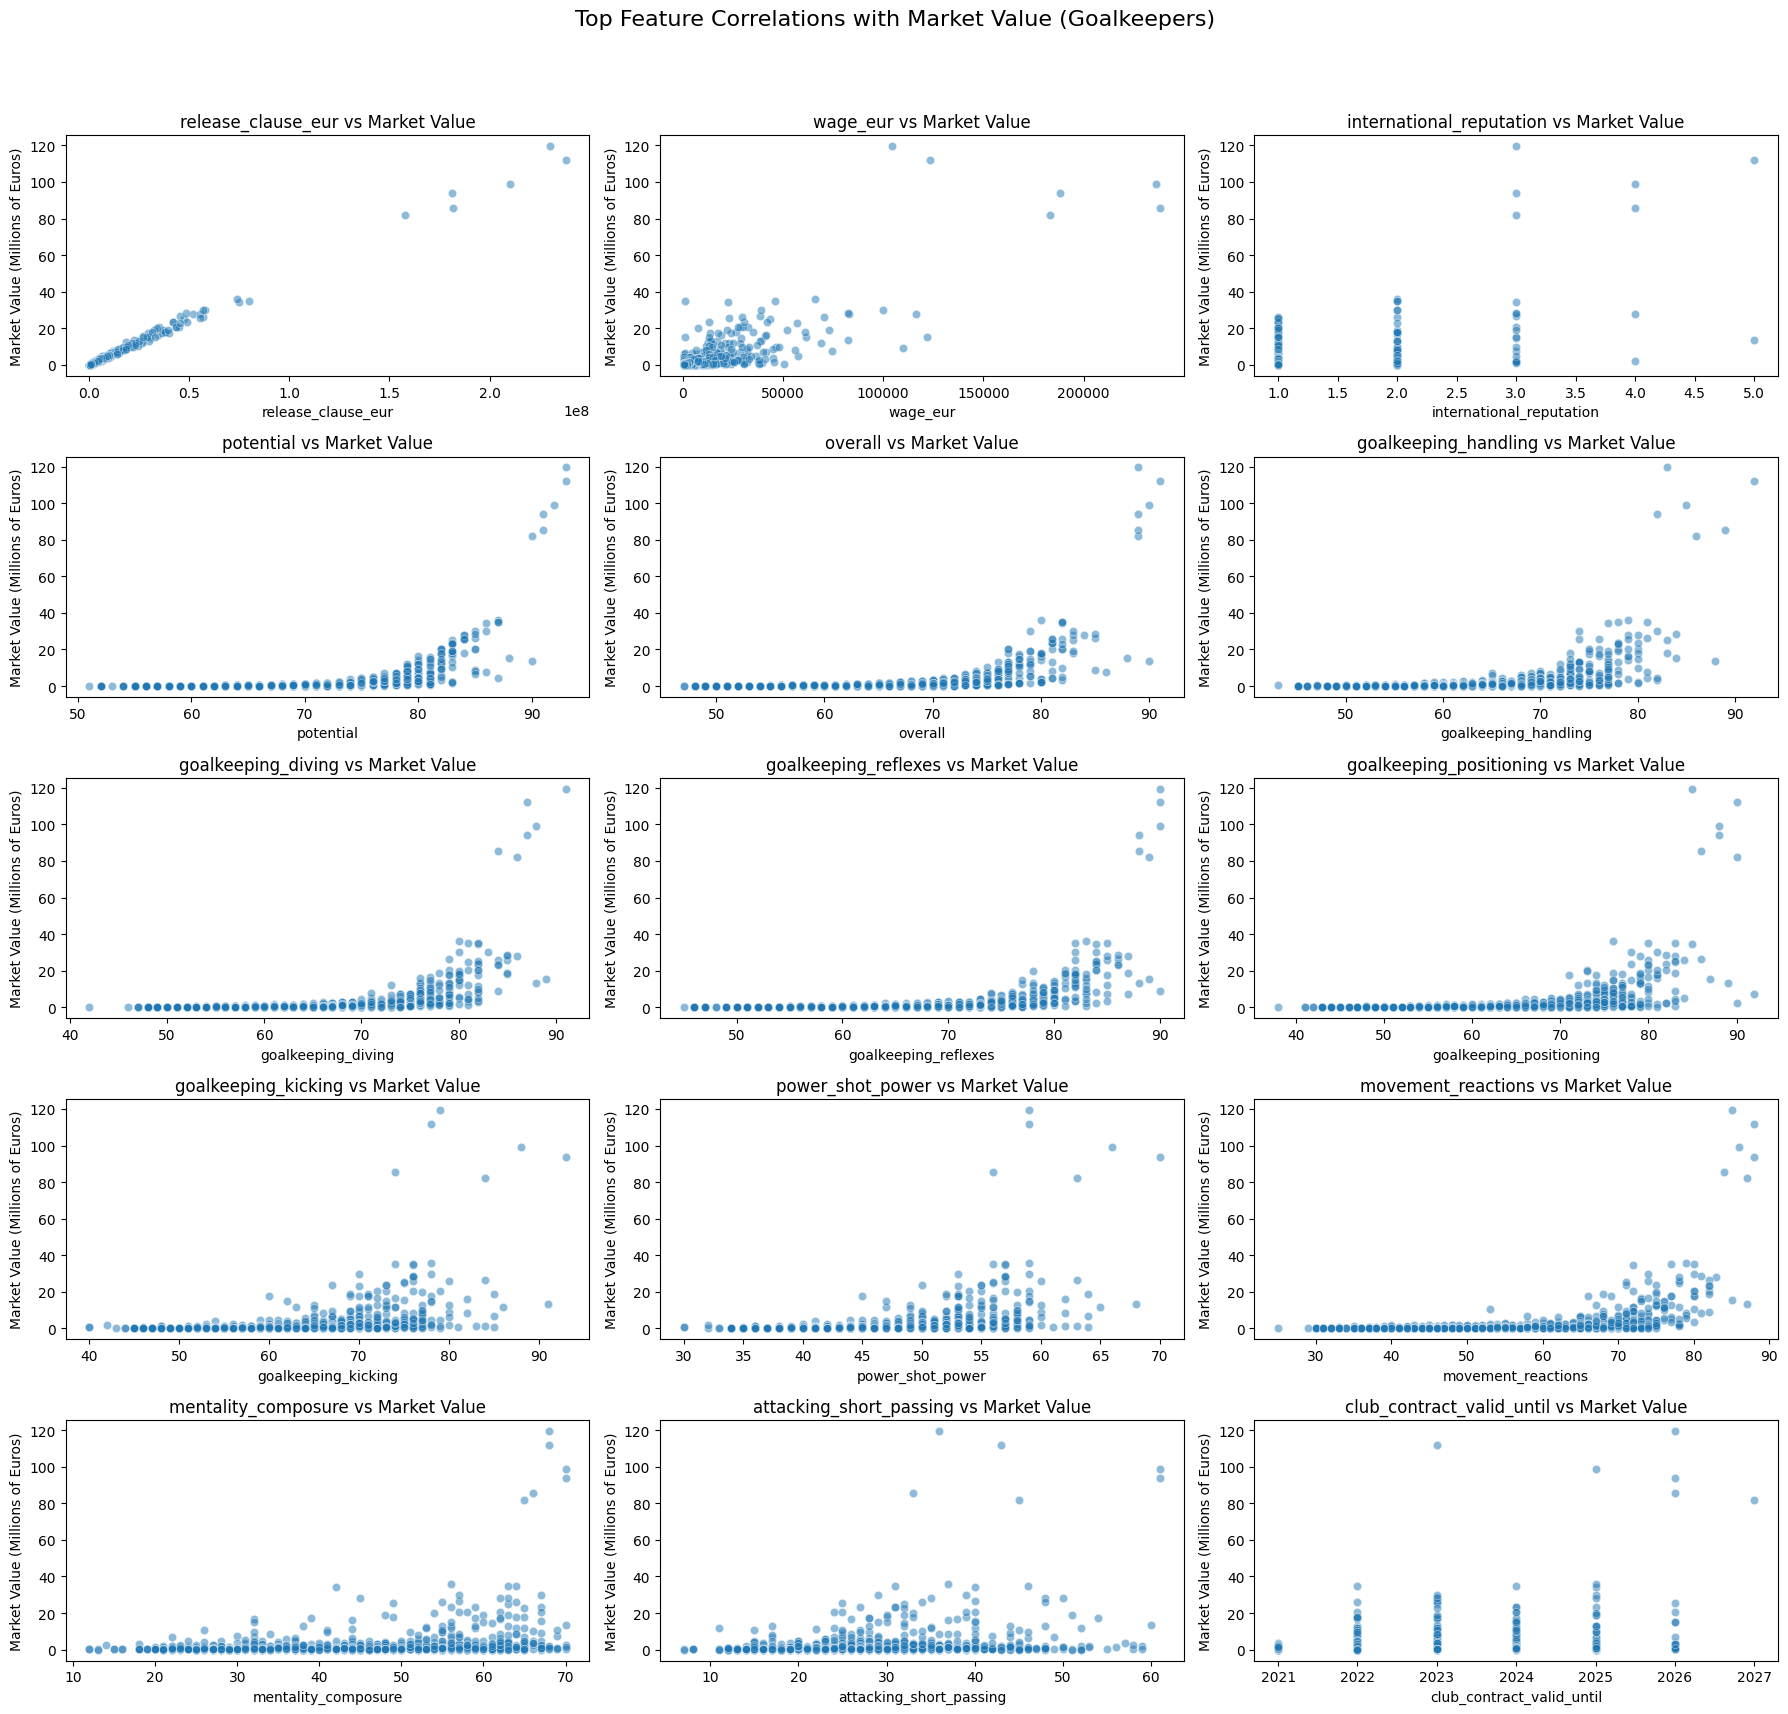

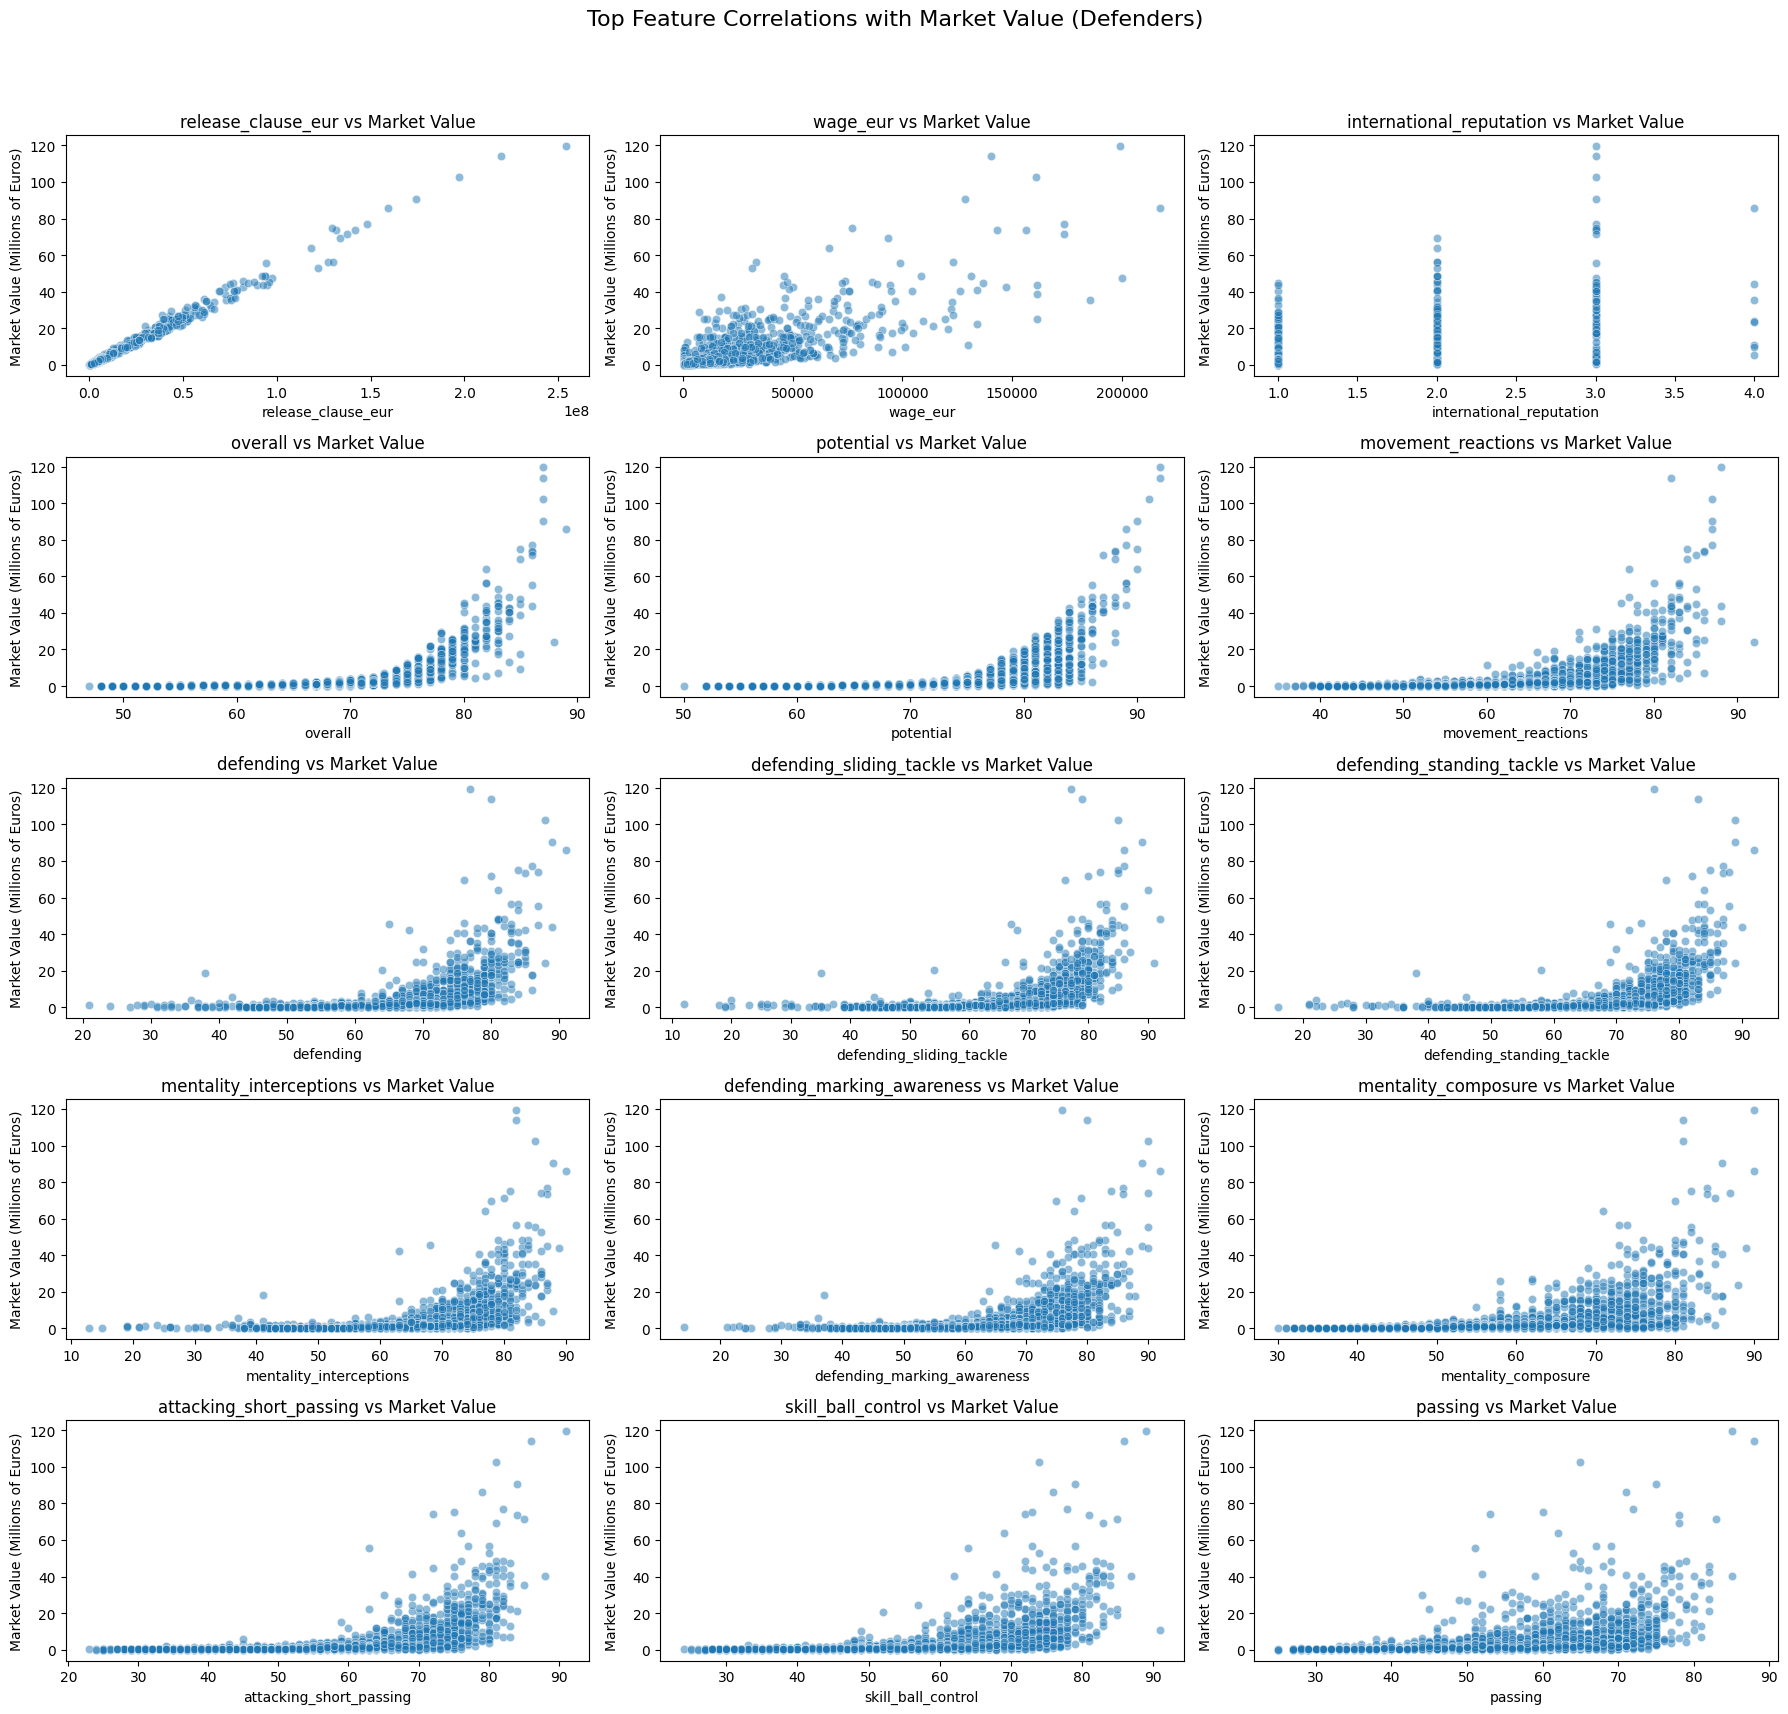

In [12]:
# Prepare one figure per player type
player_types = train["position_group"].unique()

# Convert value_eur to millions for readability
train["value_eur_millions"] = train["value_eur"] / 1e6

for player_type in player_types:
    subset = train[train["position_group"] == player_type]

    # Ensure numeric columns and compute correlation with target
    numeric_cols = subset.select_dtypes(include=["int64", "float64"]).columns.drop(["value_eur", "value_eur_millions"], errors='ignore')
    corr = subset[numeric_cols].corrwith(subset["value_eur"]).sort_values(key=abs, ascending=False)
    top_15_features = corr.head(15).index
    top_15_features

    # Plot
    fig, axes = plt.subplots(5, 3, figsize=(18, 18))
    fig.suptitle(f"Top Feature Correlations with Market Value ({player_type}s)", fontsize=16)
    axes = axes.flatten()

    for i, feature in enumerate(top_15_features):
        sns.scatterplot(data=subset, x=feature, y=subset["value_eur_millions"], ax=axes[i], alpha=0.5)
        axes[i].set_title(f"{feature} vs Market Value")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Market Value (Millions of Euros)")

    # Remove unused subplots if less than 15 features
    for j in range(len(top_15_features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()